# <center> Wine's Best Formula: Revealed <center>
    
<div style="width:100%;text-align: center;"> <img align=middle src="https://gracewinecompany.com/wp-content/uploads/2022/11/GraceWineBack.jpg" alt="Heat beating" style="height:400px;margin-top:0rem;"> </div>




<div style="padding:10px; 
            color:black;
            margin:10px;
            font-size:150%;
            display:fill;
            border-radius:1px;
            border-style: solid;
            border-color:black;
            background-color:#bfac77;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b style="color:black">Table of Contents</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="#1" style="color:black">1 - Imports</a>
        </li>
        <li>
            <a href="#2" style="color:black">2 - A look into the data</a>
            <ul>
                <li>
                    <a href="#2-1" style="color:black">2.1 - Data visualization</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#3" style="color:black">3 - Scaling Data</a>
        </li>
        <li>
            <a href="#4" style="color:black">4 - Dimensional Reduction</a>
</li>
<li>
<a href="#5" style="color:black">5 - Clustering</a>
    <ul>
                <li>
                    <a href="#5-1" style="color:black">2.1 - K-means Clustering using Elbow Method</a>
                </li>
            </ul>
    <ul>
                <li>
                    <a href="#5-2" style="color:black">2.1 - Hierarchical Clustering</a>
                </li>
            </ul>
</li>
<li>
<a href="#6" style="color:black">6 - Cluster Analysis</a>
    <ul>
                <li>
                    <a href="#6-1" style="color:black">2.1 - Cluster Visualization</a>
                </li>
            </ul>
    <ul>
                <li>
                    <a href="#6-2" style="color:black">2.1 - Numerical Analysis</a>
                </li>
            </ul>
    <ul>
                <li>
                    <a href="#6-3" style="color:black">2.1 - Variable Visualization by Cluster</a>
                </li>
            </ul>
</li>
<li>
<a href="#7" style="color:black">7 - Conclusion</a>
</li>
</ul>

</div>


<a id="1"></a>
<h1 style='background:#bfac77;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Imports</center></h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Read in csv file
df = pd.read_csv("/kaggle/input/wine-quality-data/Wine_Quality_Data.csv")


<a id="2"></a>
<h1 style='background:#bfac77;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>A look into the data</center></h1>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


The data in this dataset is all numerical except for the color of the wine. Since red and white wine differ greatly, using cluster analysis would end up just splitting into two clusters based on color. Therefore, for more accurate results, I will be doing analysis on the wine seperately.

In [5]:
# Seperating red wine
red_wine = df[df["color"] == "red"]
red_wine = red_wine.drop("color", axis = 1)
red_wine.describe()

# Removing data that interferred with clustering
red_wine = red_wine.drop([1079, 1081, 1244, 1434, 1435, 1474, 1476, 94, 396, 400, 553, 1129])

In [6]:
# Seperating white wine
white_wine = df[df["color"] == "white"]
white_wine = white_wine.drop("color", axis = 1)
white_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


For this analysis, I will be doing it on white wine. If you are interested, just change white_wine to red_wine and you will get results on red_wine.

In [7]:
wine = white_wine

The difference between the makeup of red wine versus white wine is extremely different so I will be doing unsupervised learning on them seperately.

<a name="2-1"></a>
## Data Visualization


<Axes: >

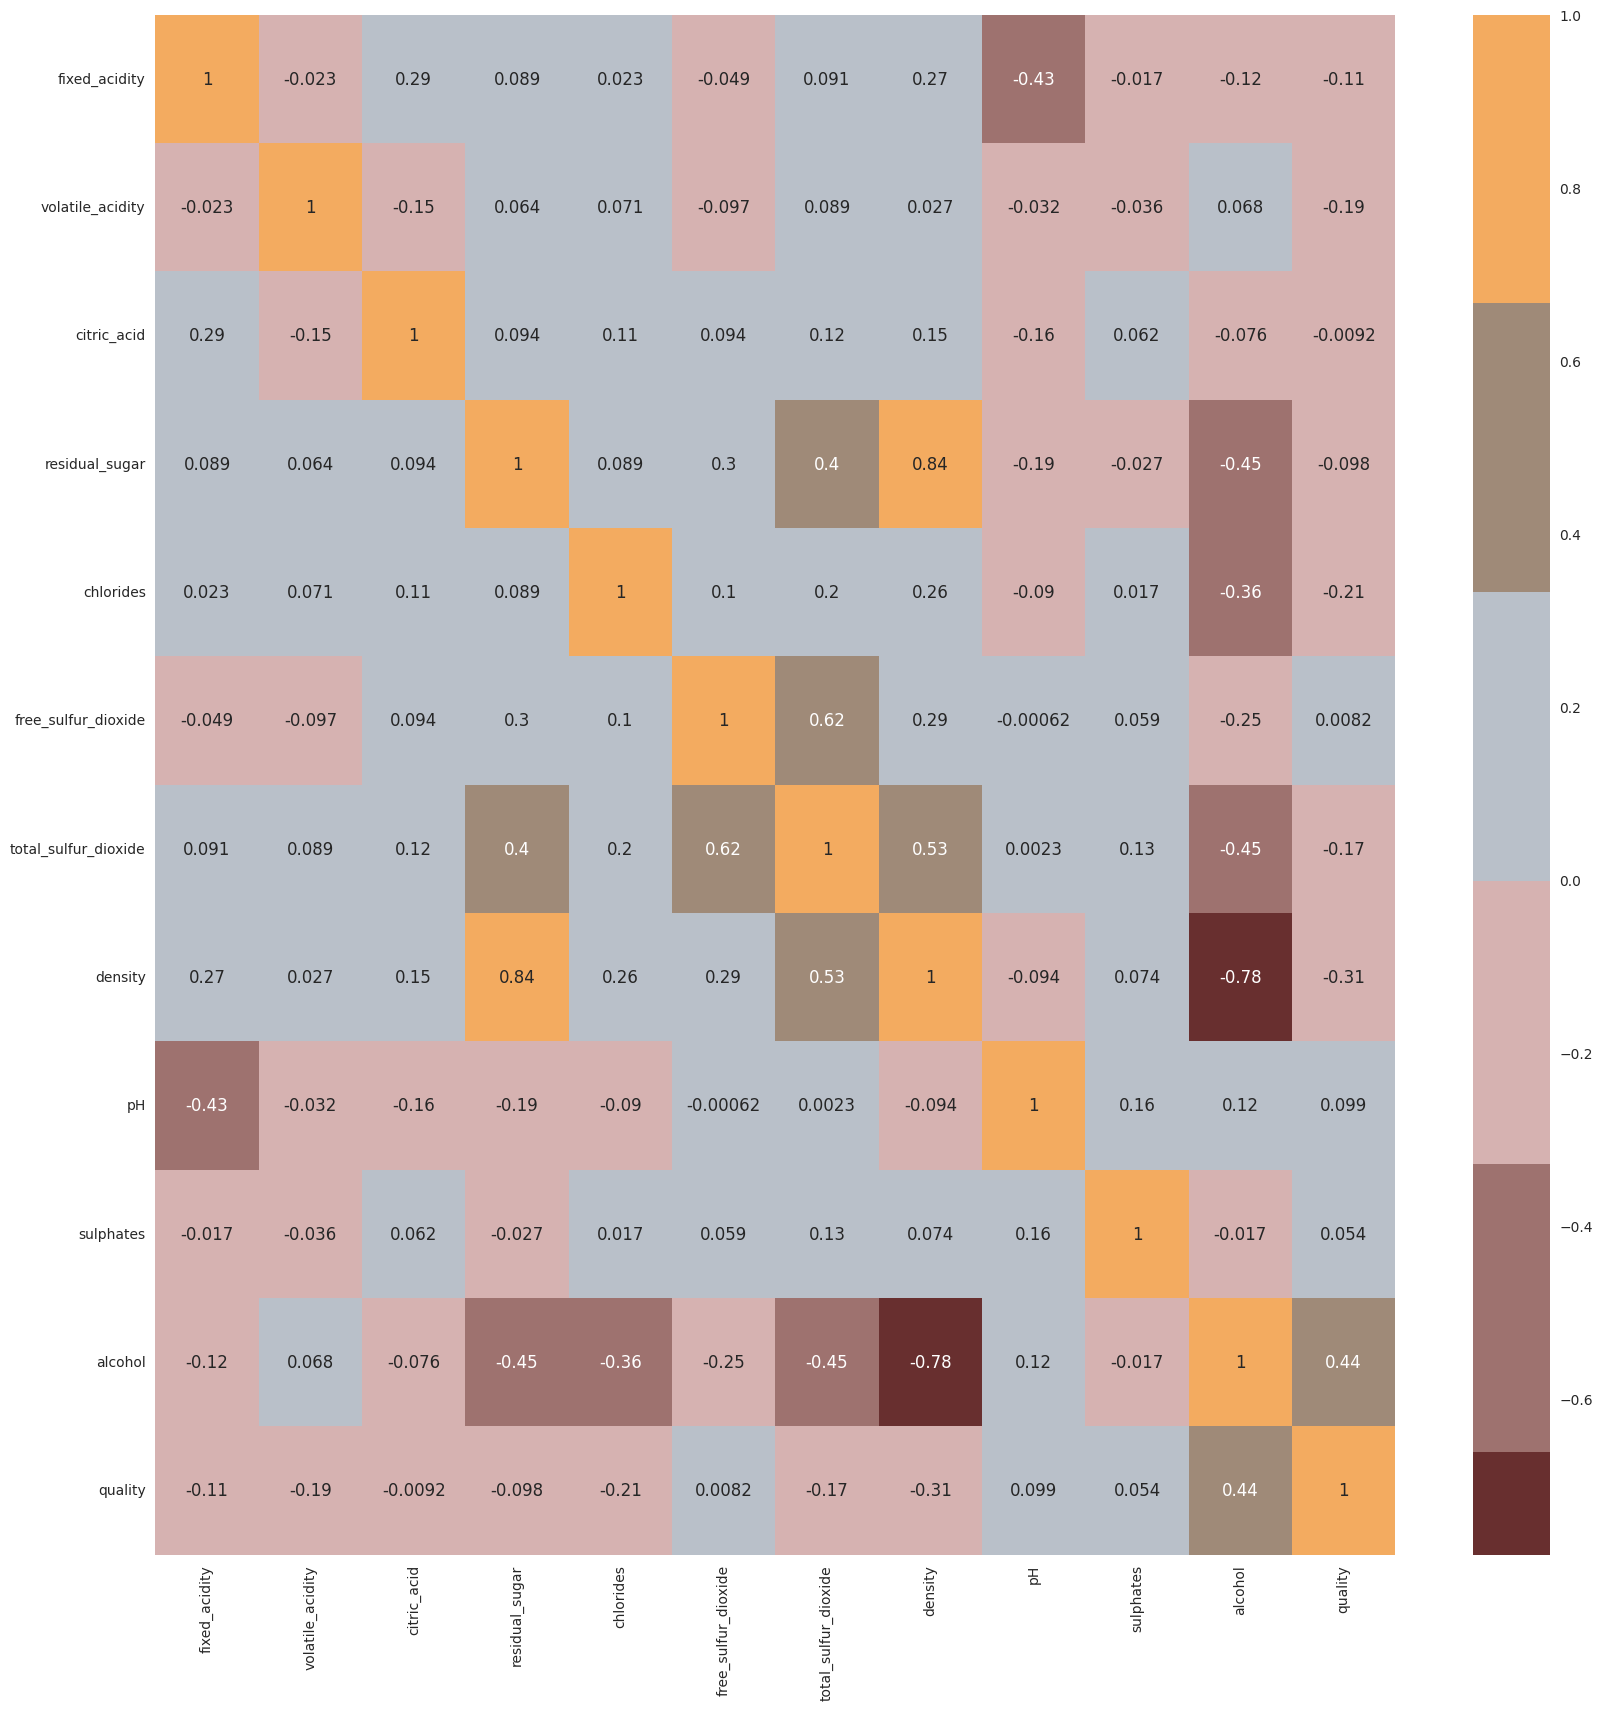

In [8]:
# Heat map of correlation between variables
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat = wine.corr()
plt.figure(figsize=(20,20)) 
sns.heatmap(corrmat, annot = True, cmap = cmap, center = 0)

Simply by looking at this correlation heat map, I can see that most of the variables have a near 0 correlation to quality. This shows that the variables don't individually have a big effect on the resulting quality. However, the correlation between alcohol and quality as well as density and quality is strong. The numbers show that a lighter wine as well as higher alcohol content is correlated with better overall quality

<a id="3"></a>
<h1 style='background:#bfac77;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Scaling Data</center></h1>

In [9]:
# Scaling data before reducing dimensions
scaler = StandardScaler()
scaler.fit(wine)
scaled = pd.DataFrame(scaler.transform(wine),columns = wine.columns)

# Scaled data
scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


<a id="4"></a>
<h1 style='background:#bfac77;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Dimensional Reduction</center></h1>

In [10]:
pca = PCA(n_components = 3)
pca.fit(scaled)
PCA = pd.DataFrame(pca.transform(scaled), columns=(["col1","col2", "col3"]))
PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,4898.0,-2.321087e-17,1.829577,-5.107800,-1.444053,-0.209821,1.490922,12.390989
col2,4898.0,-2.901359e-17,1.259529,-5.950860,-0.789918,0.044750,0.834722,8.557682
col3,4898.0,-3.626698e-17,1.171090,-5.936006,-0.750112,-0.088682,0.628057,6.453745


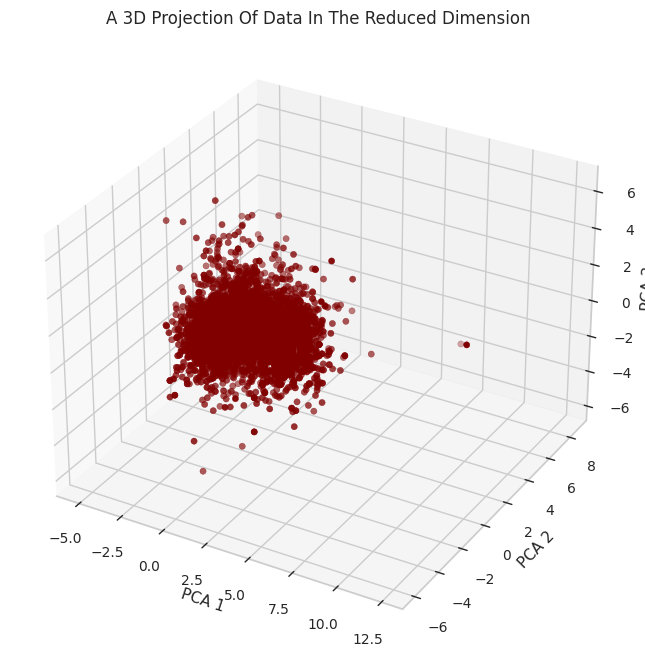

In [11]:
# Plotting the data on the new axis
x = PCA["col1"]
y = PCA["col2"]
z = PCA["col3"]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x,y,z, c = "maroon", marker = "o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()

<a id="5"></a>
<h1 style='background:#bfac77;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Clustering</center></h1>

<a name="5-1"></a>
## K-means Clustering using Elbow Method


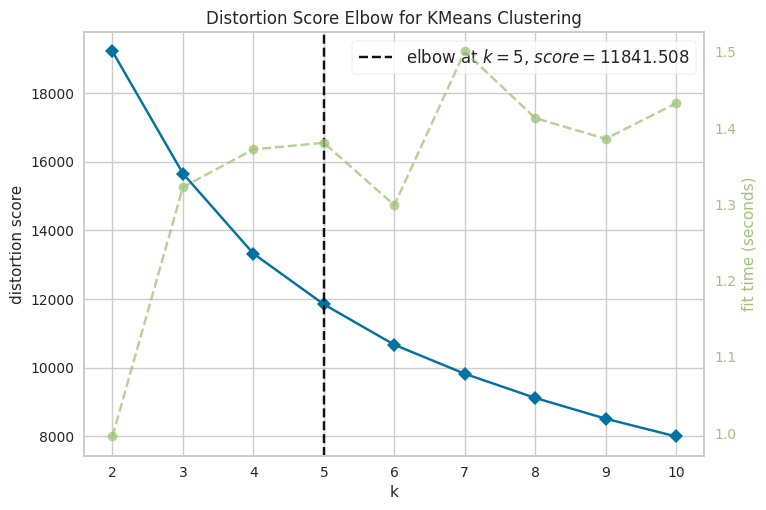

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Determining how many clusters to make
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA)
Elbow_M.show()

In [13]:
# Determined that 5 clusters are to be made
AC = AgglomerativeClustering(n_clusters = 5)

# Add clusters to data
PCA["clusters_k"] = AC.fit_predict(PCA) + 1
wine["clusters_k"] = PCA["clusters_k"]

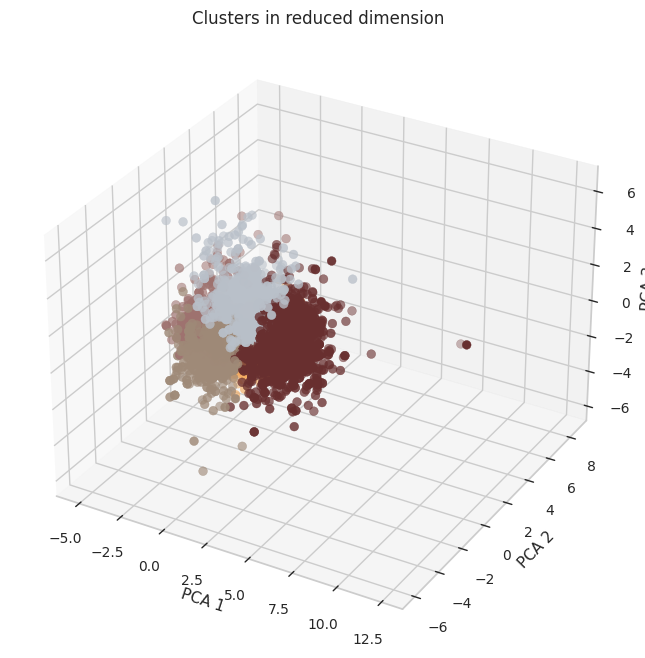

In [14]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA["col1"], PCA["col2"], PCA["col3"], s = 40, c = PCA["clusters_k"], marker = 'o', cmap = cmap)
ax.set_title("Clusters in reduced dimension")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()

<a name="5-2"></a>
## Hierarchical Clustering

In [15]:
# Hierarchical Clustering
PCA = PCA[PCA["col1"] < 6.77]
Z = linkage(PCA, method='complete', metric='chebyshev')

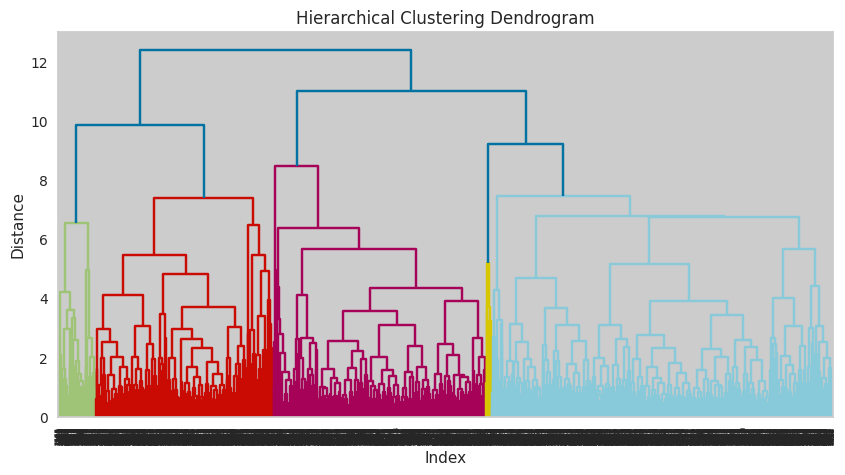

In [16]:
# Determining cutoff
cutoff = 6
while True:
    labels = fcluster(Z, cutoff, criterion='distance')
    if len(np.unique(labels)) == 5:
        break
    else:
        cutoff += .1
PCA["clusters_h"] = labels
wine["clusters_h"] = PCA["clusters_h"]
plt.figure(figsize = (10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

<a id="6"></a>
<h1 style='background:#bfac77;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Cluster Analysis</center></h1>

<a name="6-1"></a>
## Cluster Visualization


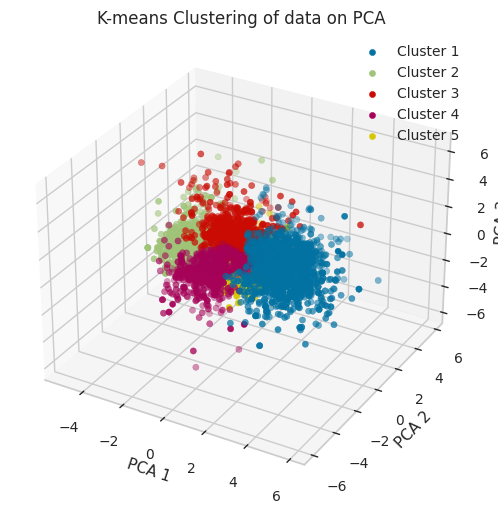

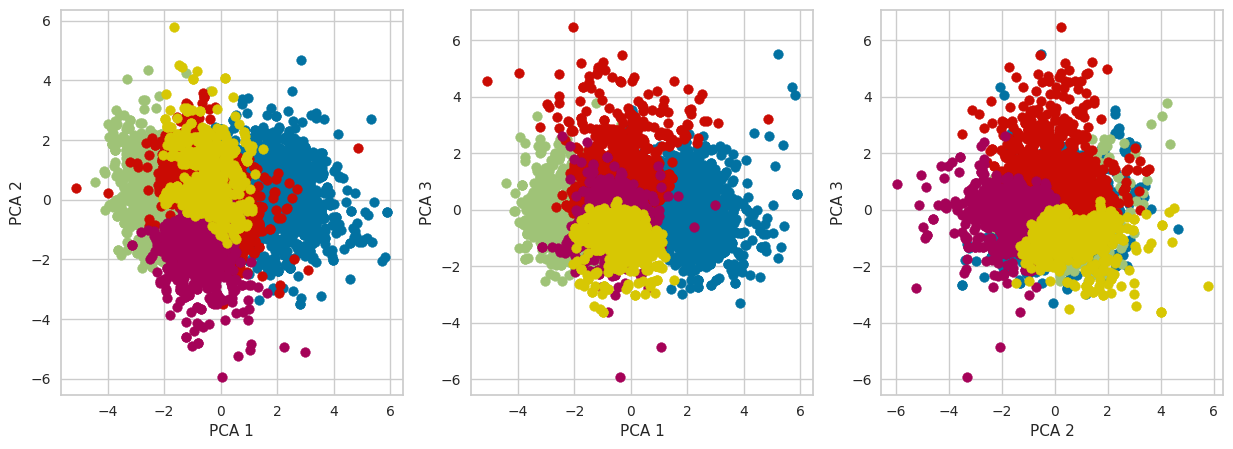

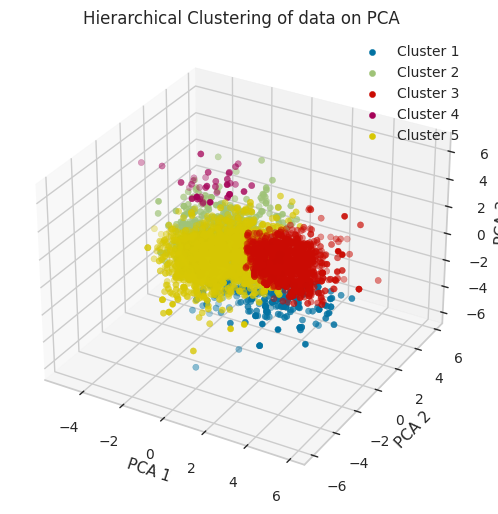

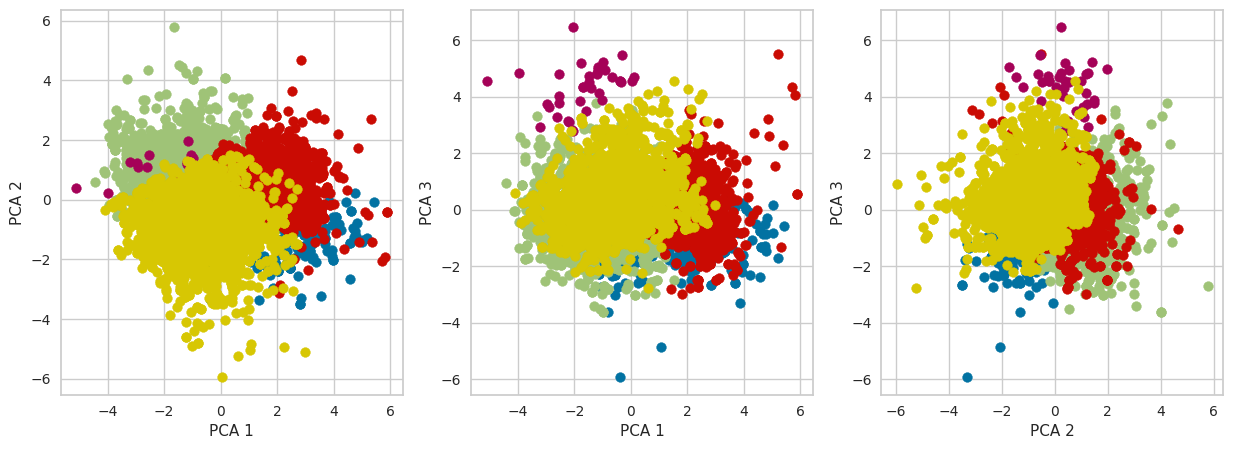

In [17]:
clusters = ["clusters_k", "clusters_h"]
for cluster in clusters:
    fig = plt.figure(figsize=(8, 6))
    figgy = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax1 = figgy.add_subplot(131)
    ax2 = figgy.add_subplot(132)
    ax3 = figgy.add_subplot(133)
    for cluster_label in np.unique(PCA[cluster]):
        cluster_points = PCA[PCA[cluster] == cluster_label]
        ax.scatter(cluster_points["col1"], cluster_points["col2"], cluster_points["col3"], label = f'Cluster {cluster_label}')
        ax1.scatter(cluster_points["col1"], cluster_points["col2"])
        ax2.scatter(cluster_points["col1"], cluster_points["col3"])
        ax3.scatter(cluster_points["col2"], cluster_points["col3"])
    if cluster != "clusters_k":
        ax.set_title('Hierarchical Clustering of data on PCA')
    else:
        ax.set_title('K-means Clustering of data on PCA')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    ax1.set_xlabel('PCA 1')
    ax1.set_ylabel('PCA 2')
    ax2.set_xlabel('PCA 1')
    ax2.set_ylabel('PCA 3')
    ax3.set_xlabel('PCA 2')
    ax3.set_ylabel('PCA 3')
    ax.legend()
    plt.show()

Ignoring the outliers, the clusters look compact which shows signs of similarity between points in each cluster. However, there seems to be a lot of overlap as well which might cause low dissimilarity between clusters. 

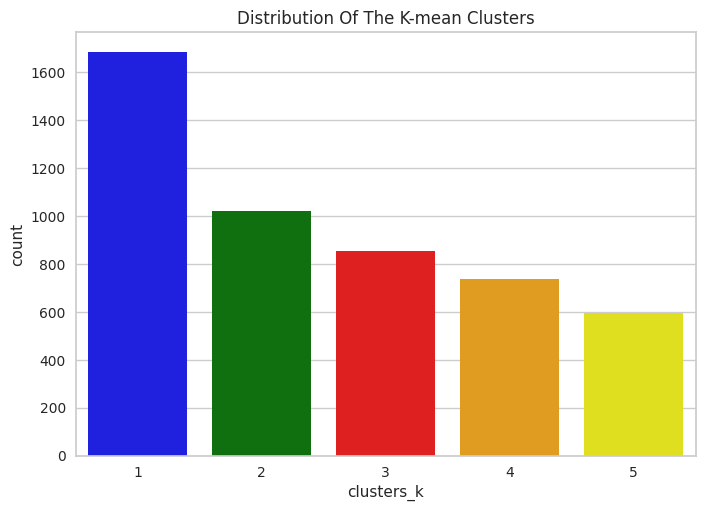

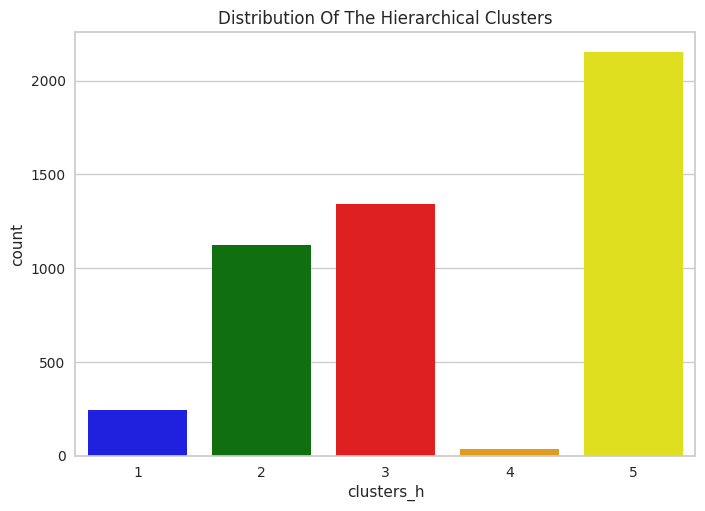

In [18]:
# Tallying the number of points in each cluster
for cluster in clusters:
    pl = sns.countplot(x = PCA[cluster], palette = ["blue", "green", "red", "orange", "yellow"])
    if(cluster == "clusters_k"):
        pl.set_title("Distribution Of The K-mean Clusters")
    else:
        pl.set_title("Distribution Of The Hierarchical Clusters")
    plt.show()

In [19]:
wine[wine["clusters_h"] == 4]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,clusters_k,clusters_h
2092,6.30,0.190,0.28,1.80,0.022,28.0,158.0,0.99070,3.20,0.64,11.4,6,3.0,4.0
3454,8.00,0.220,0.28,14.00,0.053,83.0,197.0,0.99810,3.14,0.45,9.8,6,3.0,4.0
3528,8.80,0.340,0.33,9.70,0.036,46.0,172.0,0.99660,3.08,0.40,10.2,5,3.0,4.0
3571,7.60,0.200,0.26,4.50,0.086,37.0,133.0,0.99630,3.15,0.42,9.2,5,3.0,4.0
3635,5.70,0.270,0.32,1.20,0.046,20.0,155.0,0.99340,3.80,0.41,10.2,6,3.0,4.0
3662,7.60,0.180,0.36,2.40,0.049,38.0,123.0,0.99600,3.60,0.46,10.3,5,3.0,4.0
3710,6.50,0.220,0.25,17.10,0.050,44.0,138.0,1.00010,3.30,0.37,8.8,5,3.0,4.0
3879,6.40,0.160,0.25,1.30,0.047,20.0,77.0,0.99330,3.61,0.54,10.2,6,3.0,4.0
3901,6.00,0.260,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,5,3.0,4.0
4039,6.80,0.460,0.26,6.30,0.147,49.0,159.0,0.99434,3.14,0.47,10.0,5,3.0,4.0


<a name="6-2"></a>
## Numerical Analysis


In [20]:
# Displaying the mean for each variable in each cluster
for cluster in clusters:
    for i in range(1, int(max(np.unique(wine[cluster])) + 1)):
        if cluster == "clusters_k":
            print(f"\nCluster {i} using K-means clustering\n")
        else:
            print(f"\nCluster {i} using hierarchical clustering\n")
        print(wine[wine[cluster] == i].mean().T)


Cluster 1 using K-means clustering

fixed_acidity             6.970036
volatile_acidity          0.276780
citric_acid               0.340868
residual_sugar            6.342129
chlorides                 0.045462
free_sulfur_dioxide      35.034436
total_sulfur_dioxide    140.972719
density                   0.994348
pH                        3.207943
sulphates                 0.489723
alcohol                  10.344275
quality                   5.867621
clusters_k                1.000000
clusters_h                3.015233
dtype: float64

Cluster 2 using K-means clustering

fixed_acidity             7.094437
volatile_acidity          0.270377
citric_acid               0.362583
residual_sugar            6.115793
chlorides                 0.045703
free_sulfur_dioxide      36.081841
total_sulfur_dioxide    143.445652
density                   0.994302
pH                        3.193964
sulphates                 0.486752
alcohol                  10.421355
quality                   5.907928
c

Clearly from the means, we can see that each cluster while looking different on the graphs, they have super similar data points. This might be because of the clear overlap between clusters. Other than hierarchical cluster 4, all the clusters have similar qualities with an average around 5.8. Each variable mean is also around the same number across clusters. 
However, just the mean doesn't give an accurate representation of the clusters. We can use violin plots to visualize the distribution of data points in each cluster for each variable.

<a name="6-3"></a>
## Variable Visualization by Cluster


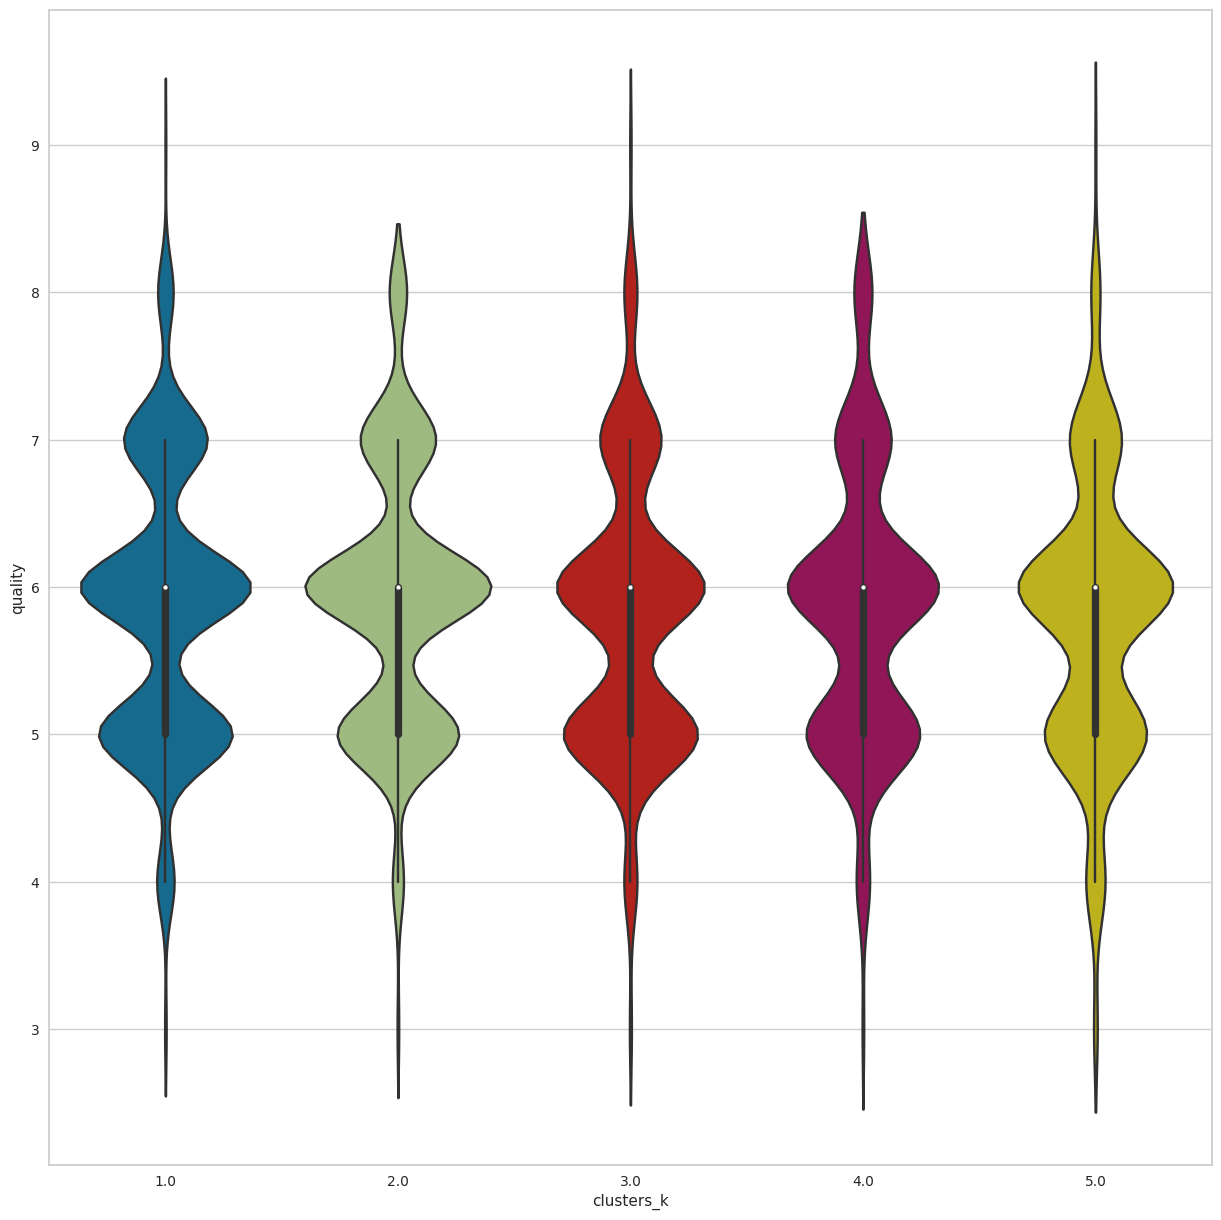

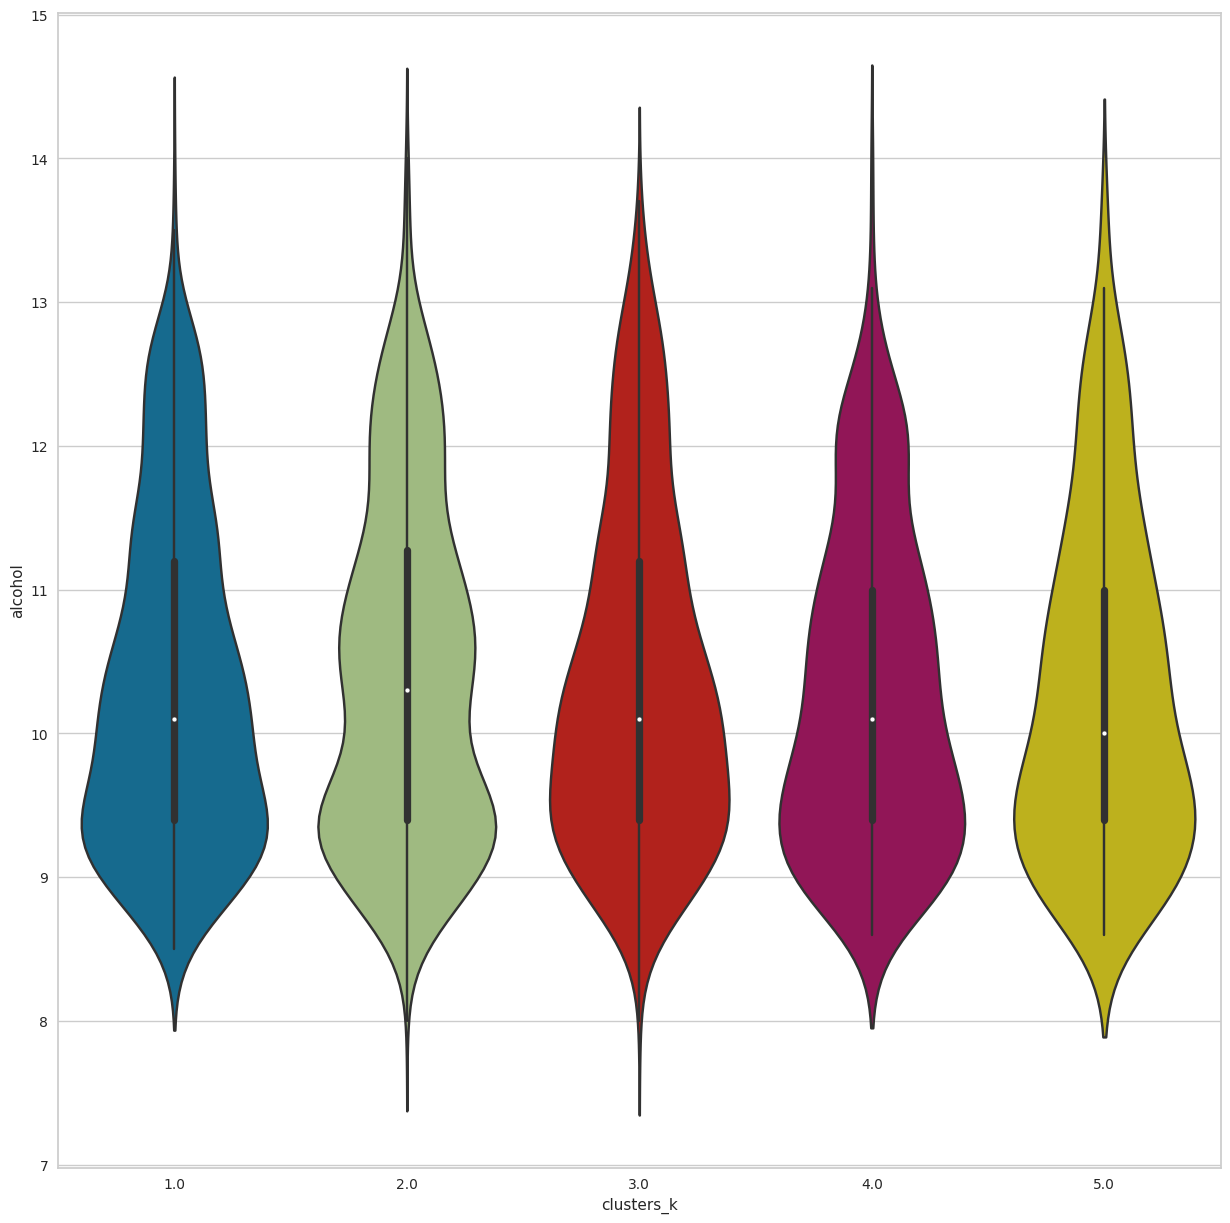

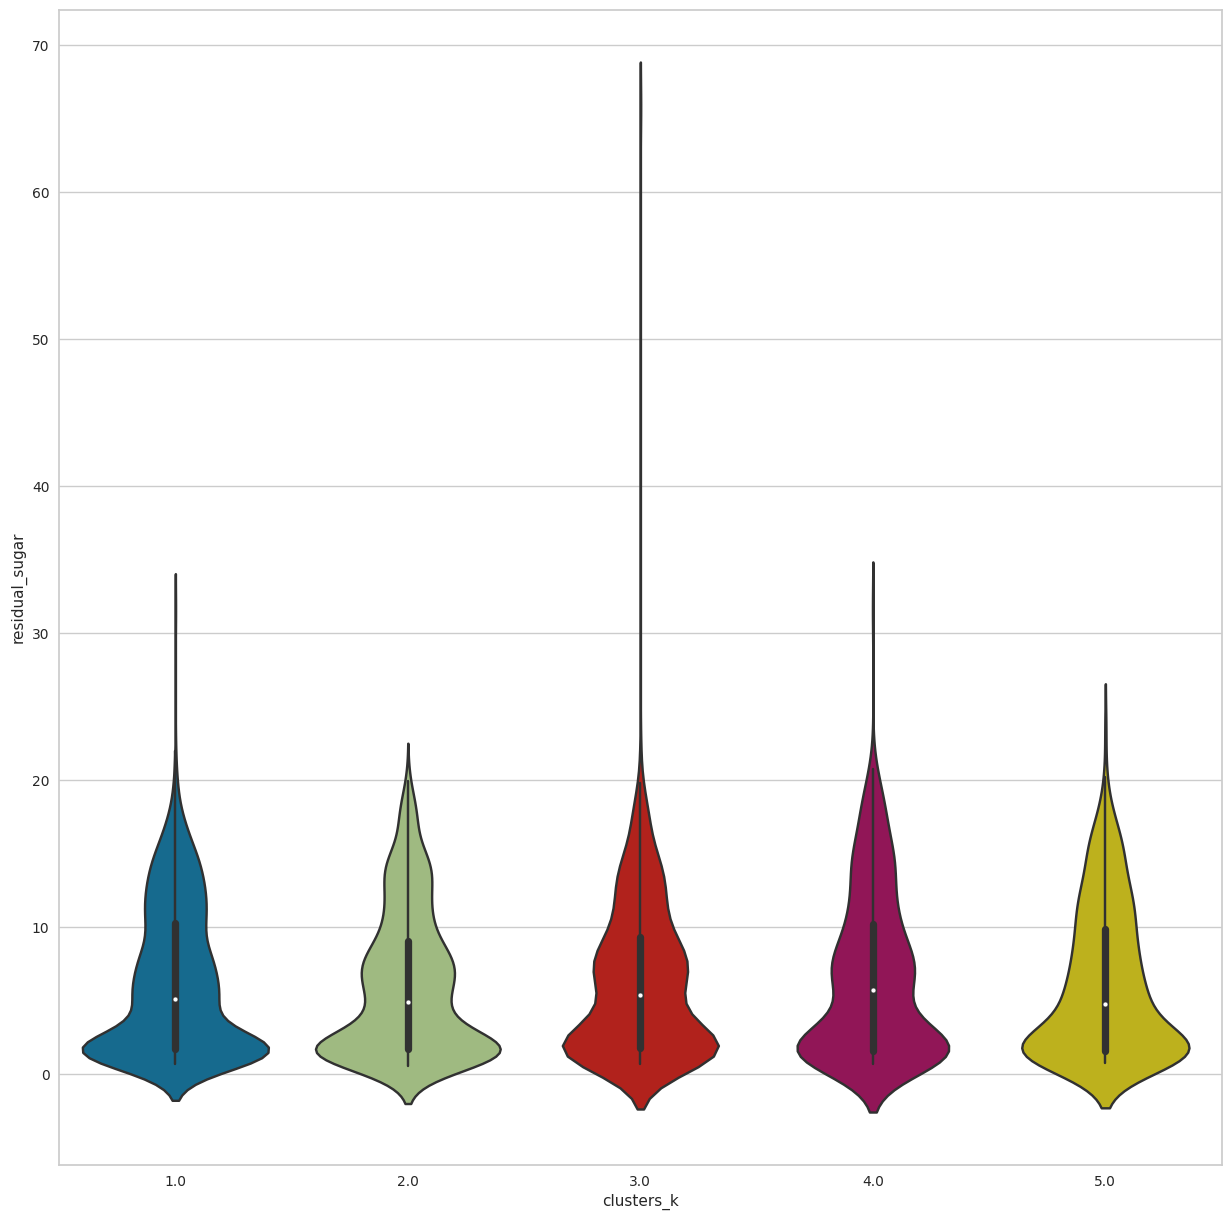

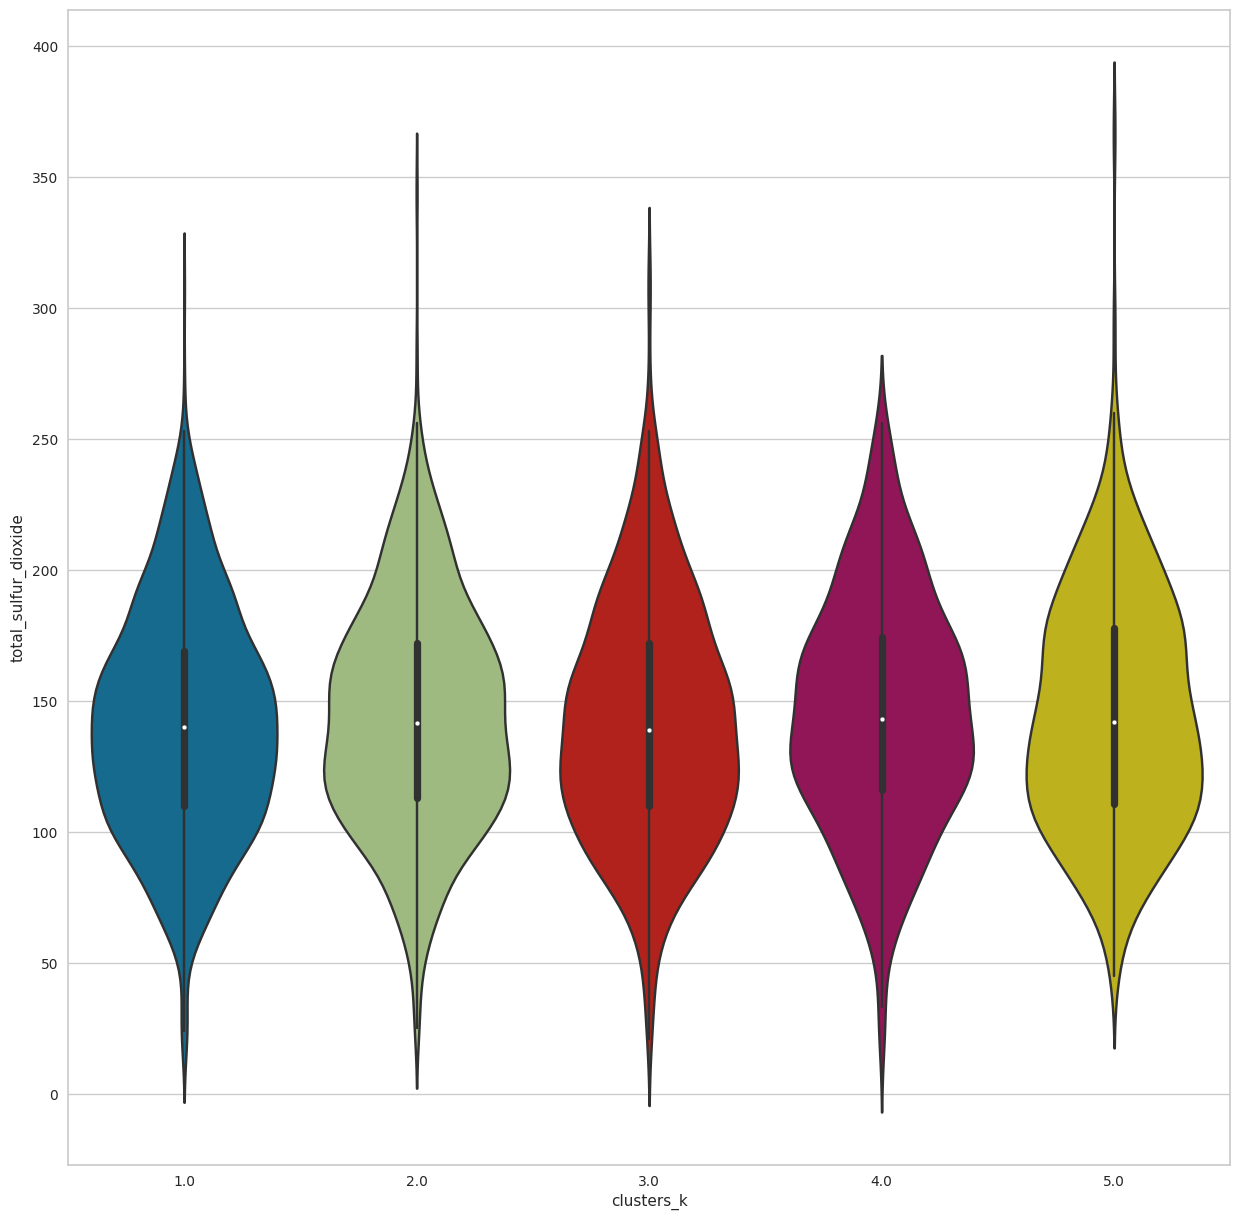

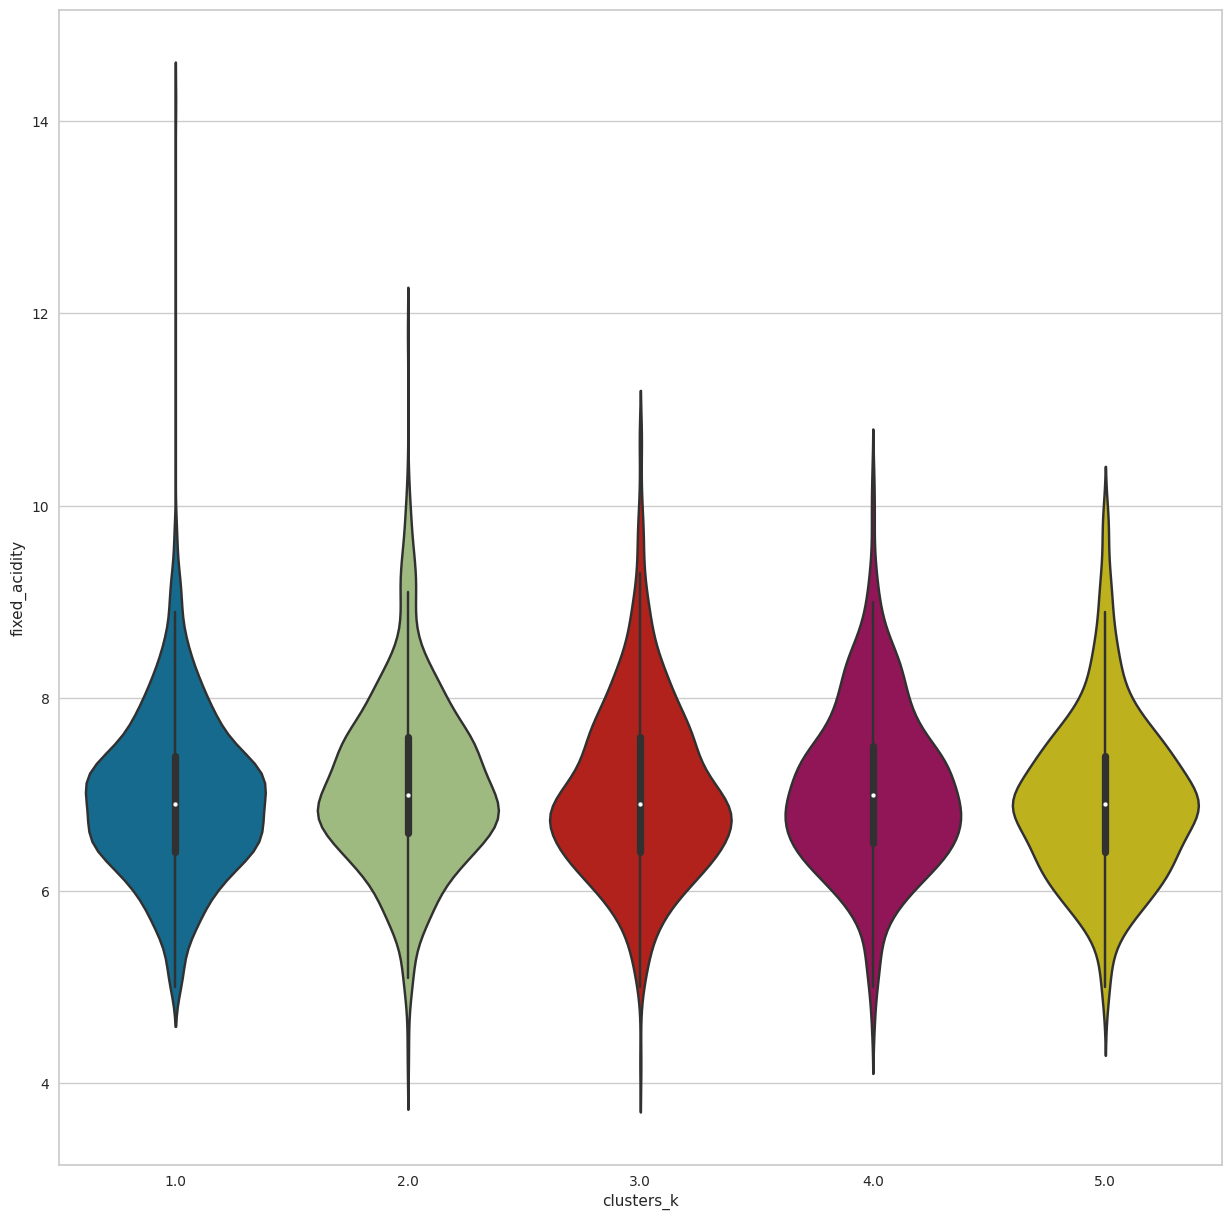

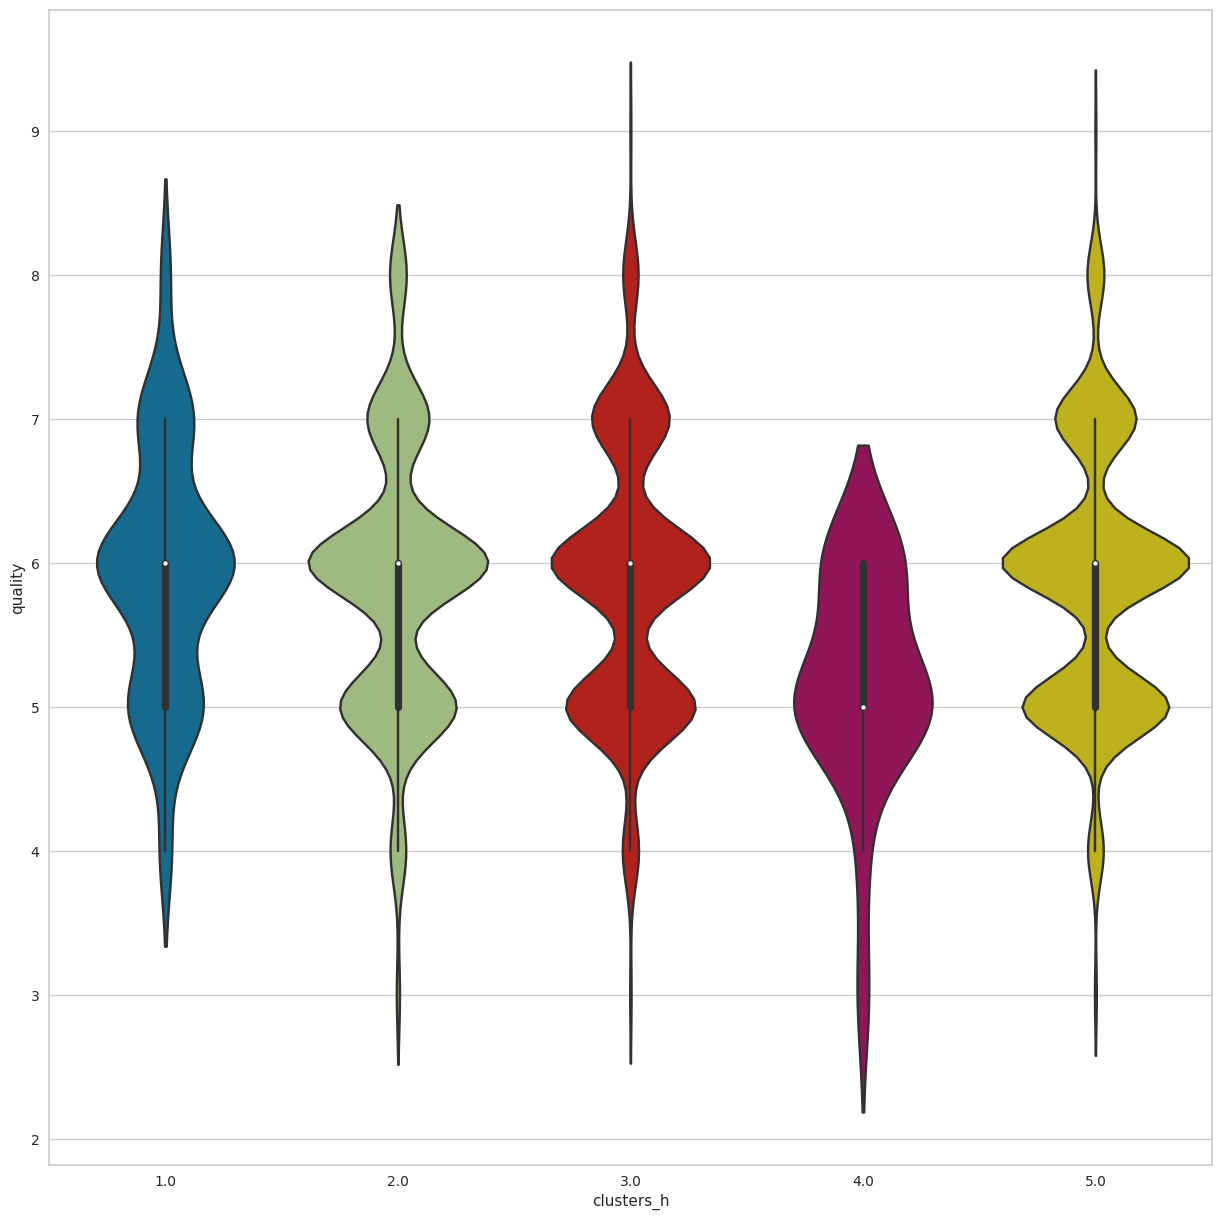

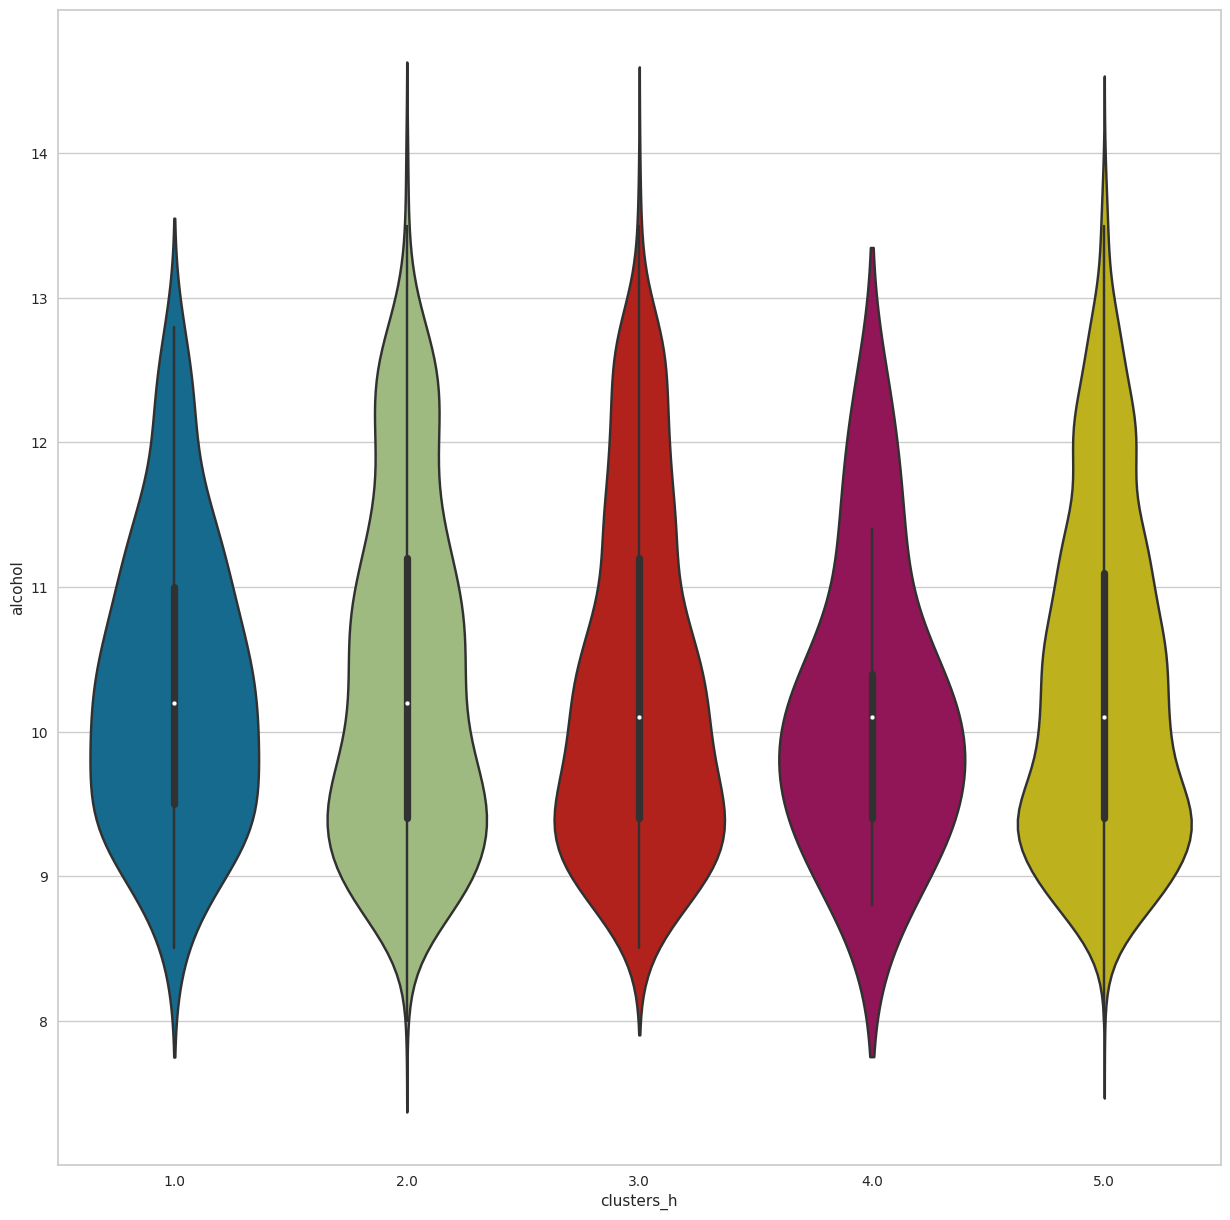

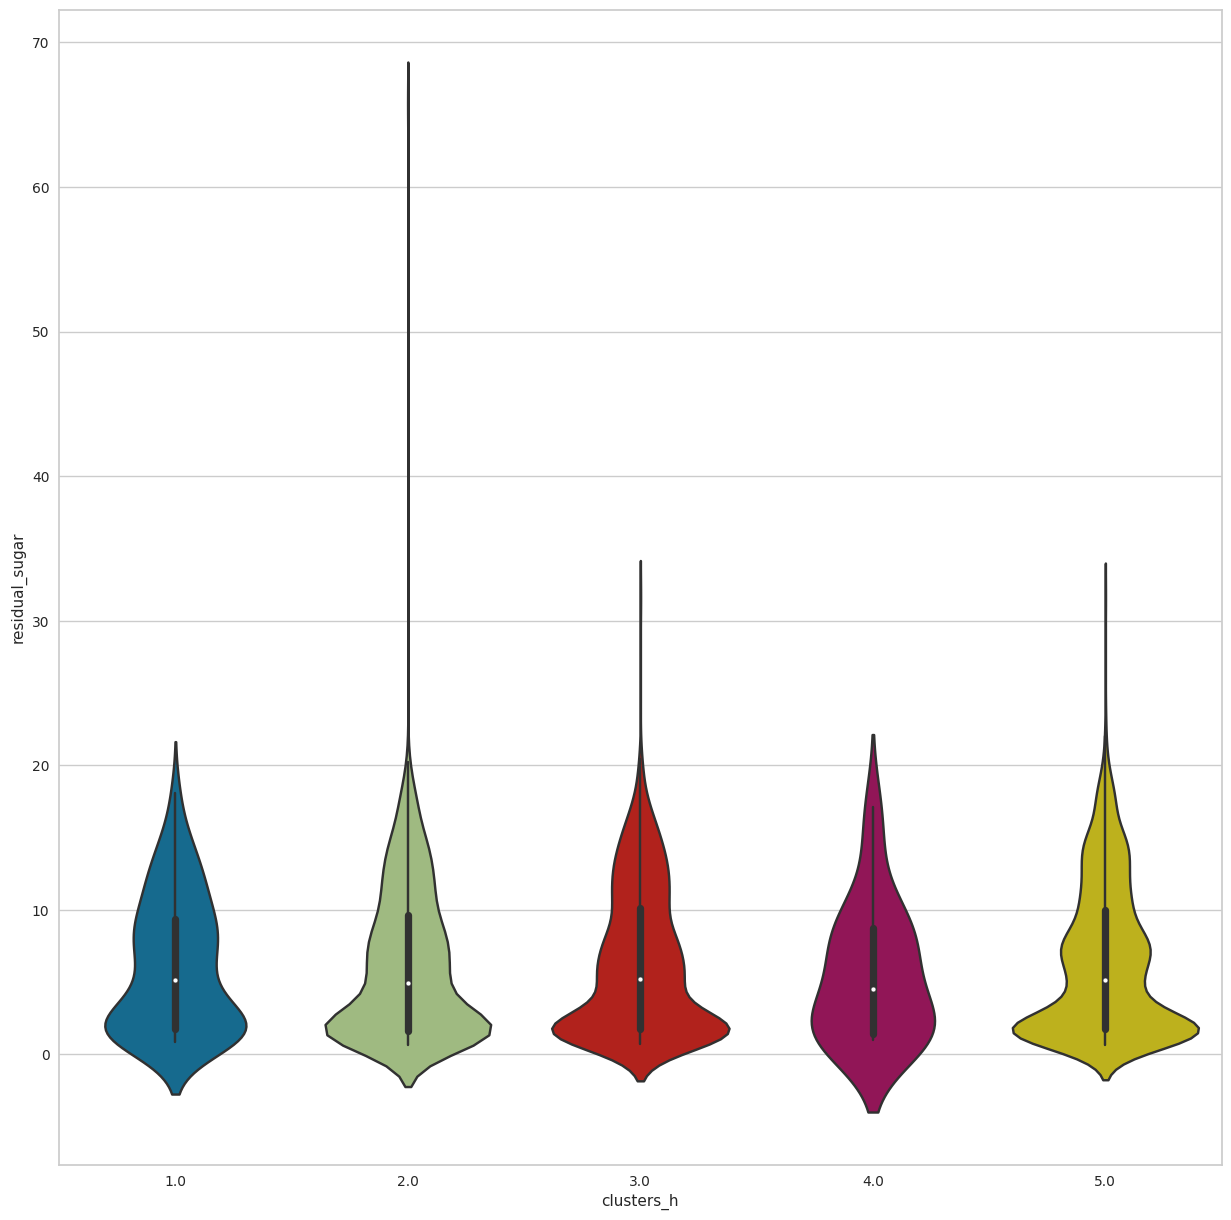

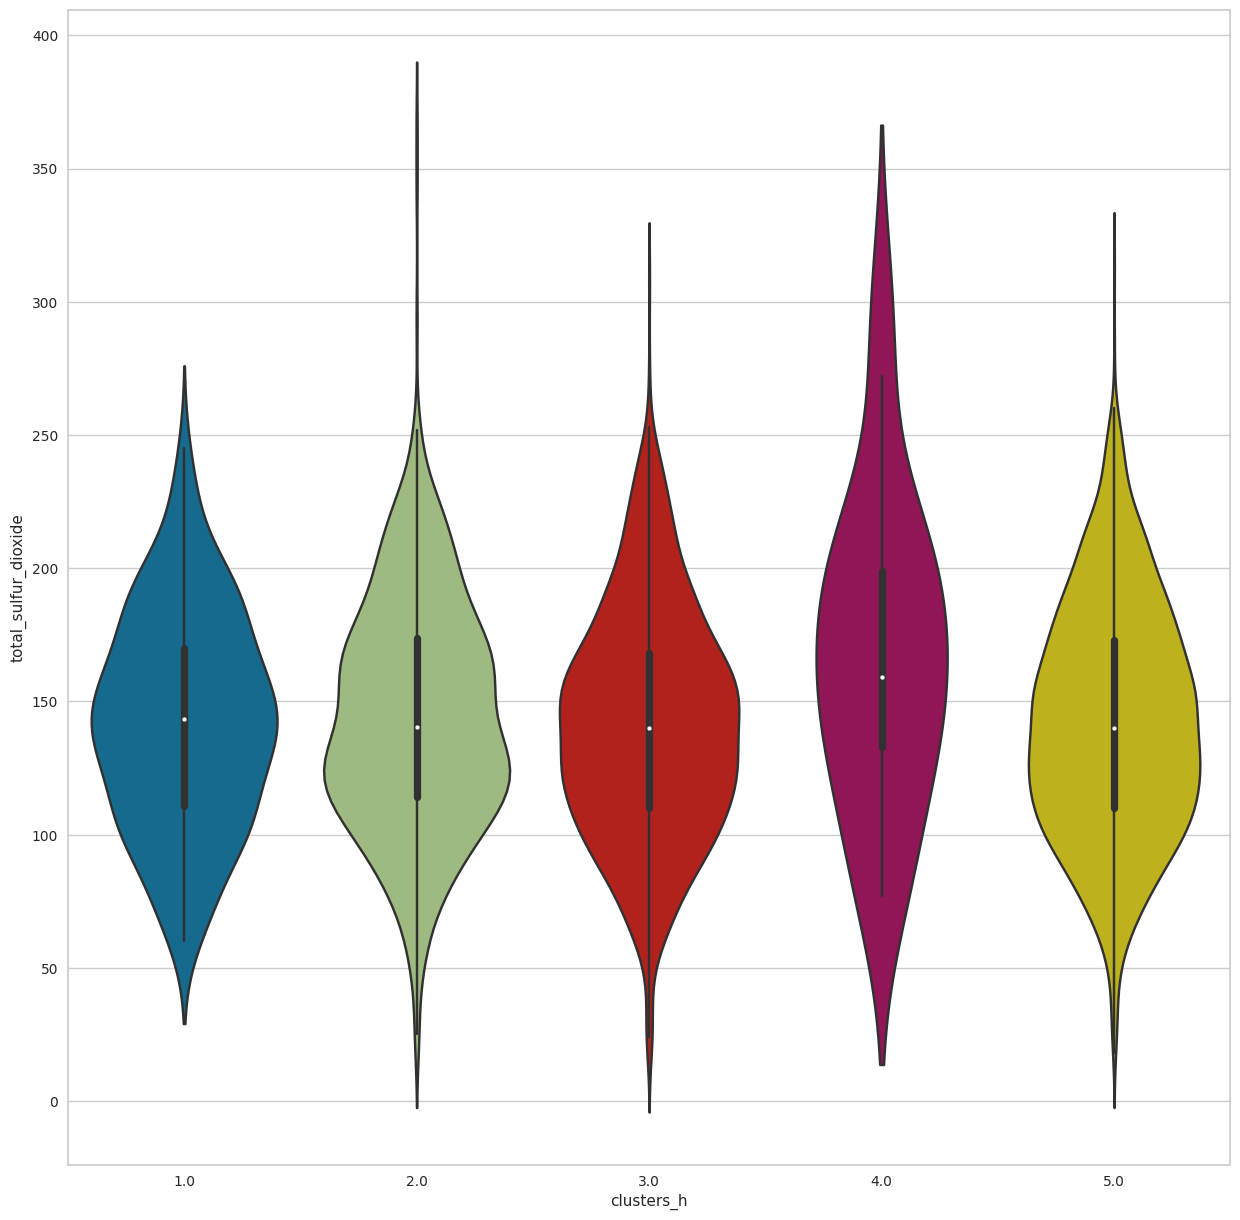

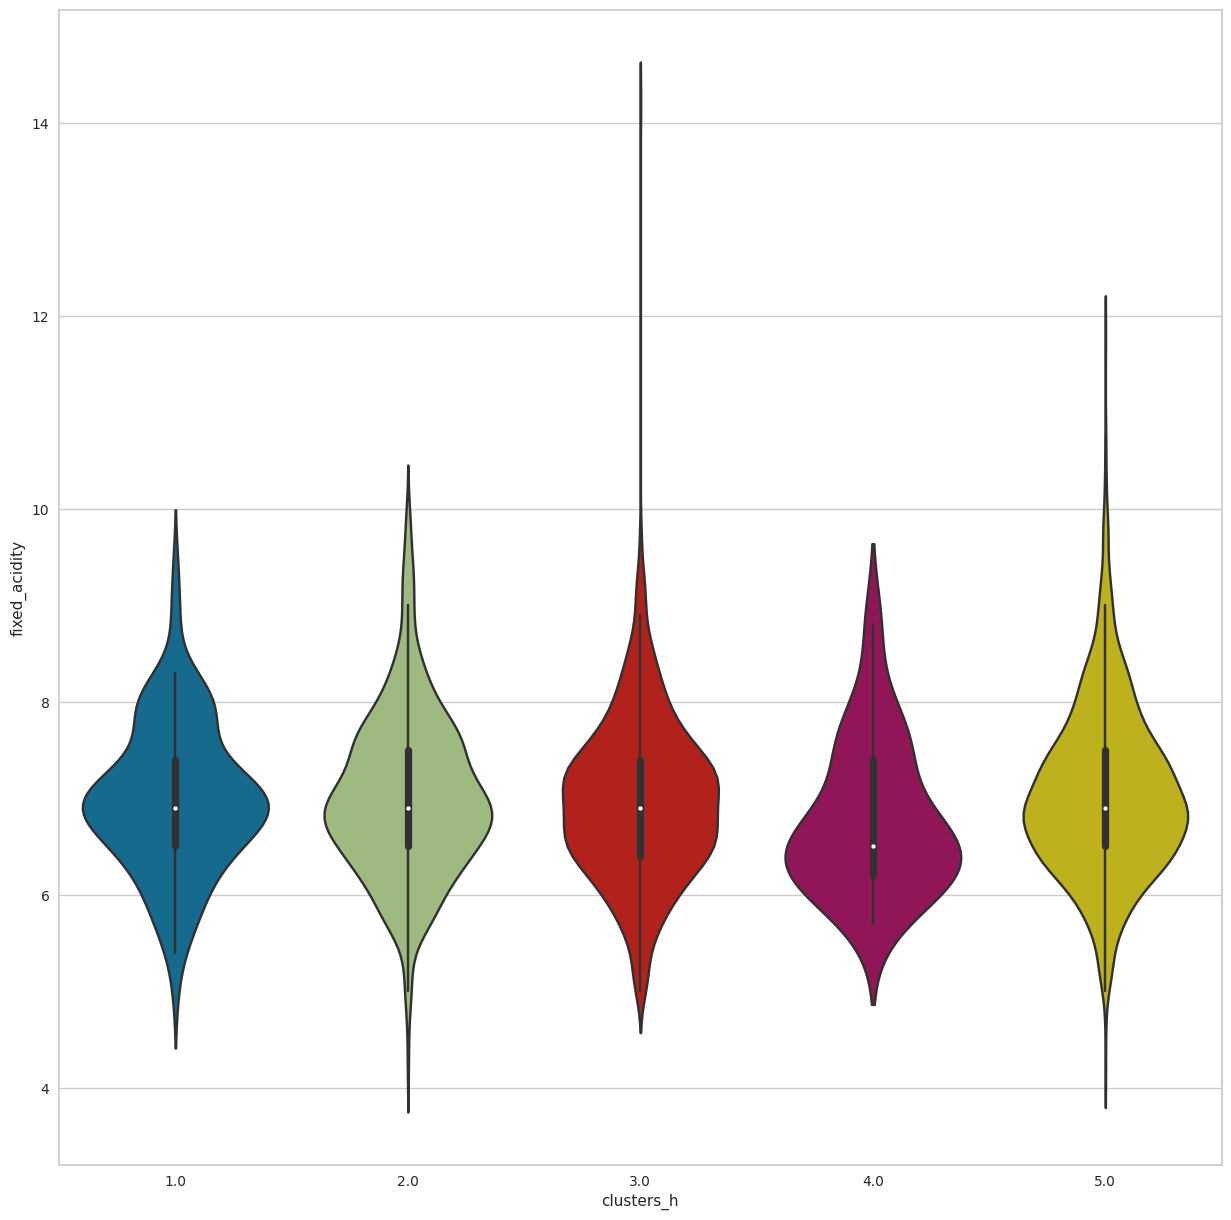

In [21]:
traits = ["quality", "alcohol", "residual_sugar", "total_sulfur_dioxide", "fixed_acidity"]
for cluster in clusters:
    for trait in traits:
        plt.figure(figsize = (15,15))
        sns.violinplot(x = wine[cluster], y = wine[trait])
        plt.show()

In every single graph, the clusters seem to have near identical distributions. This shows strong similarity between the clusters. 

<a id="7"></a>
<h1 style='background:#bfac77;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Conclusion</center></h1>

Why did we get clusters that are so similar that they don't show any conclusions? Is it because we did the PCA incorrectly? Is it a problem with the clustering method used? Maybe an average linkage should've been used for hierarchical clustering instead. Or maybe, there are no distinct clusters at all!

Even with using two differen clustering techniques, there was no unique clusters found. However, good clustering doesn't necessarily result in distinct clusters. Depending on the data used used, its possible that there are no compact clusters that stand out from the rest. Thus, the similarity between clusters does allow us to come to a conclusion and this conclusion does make a lot of sense in this context.

Wine is made from fermented grapes. The cost of wine is caused by its rarity, which come with the length of time it takes to ferment. "Good" wine is then defined as very old wine. However, quality, doesn't necessarily increase as the age of the wine increases. While quality sounds like an objective measure, it is a subjective measure that depends on an individual's taste. 

Therefore, there is no "best formula" because one's favorite might be another's least liked. Everyone's familiar with the phenomenon of people preferring cheaper wines over more expensive ones. Some sweet wines might be highly rated causing us to believe that sweeter wines are better. However, there might be wines that aren't sweet at all that are rated just as high. The clustering done in this notebook has shown that there isn't a single change that can objectivly raise the "quality" of the wine. Wine is simply an edible item that caters to specific tastes. 